In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = np.array([[3,4],[2,8],[6,9],[10,12]])
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [8]:
data= pd.DataFrame(data,columns=["math","bio"])

In [9]:
data

,math,bio
0,3,4
1,2,8
2,6,9
3,10,12


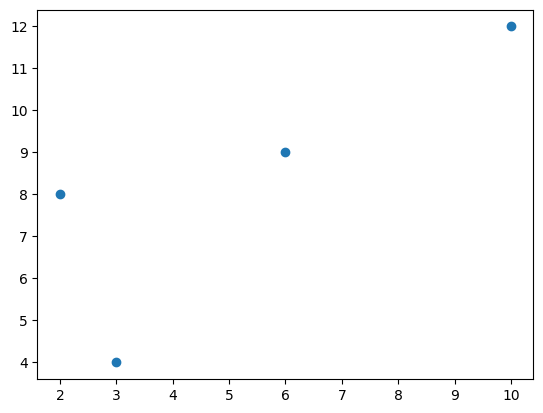

In [10]:
plt.scatter(data['math'],data['bio'])

1. Standardization
2. Cov-Matrix
3. Eigen values
4. Principal Component

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
scaled_data = scaler.fit_transform(data)

In [13]:
# find out cov matrix

cov_matrix = np.cov(scaled_data.T)
cov_matrix

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

In [14]:
# find out eigen value and eigen vector 

eigen_values, eigen_vectors = eig(cov_matrix)
print(eigen_values)
print(eigen_vectors)

[2.40938985 0.25727682]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [15]:
# principal component
eigen_vectors.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_data)

PCA()

In [17]:
final_data = pd.DataFrame(pca.fit_transform(scaled_data),columns=['PC1','PC2'])
final_data

,PC1,PC2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [24]:
variance_of_component = pca.explained_variance_ratio_

In [25]:
variance_of_component

array([0.90352119, 0.09647881])

In [20]:
var = sorted(list(variance_of_component),reverse=True)

In [21]:
var

[0.903521191979135, 0.09647880802086492]

In [26]:
np.cumsum(var)

array([0.90352119, 1.        ])

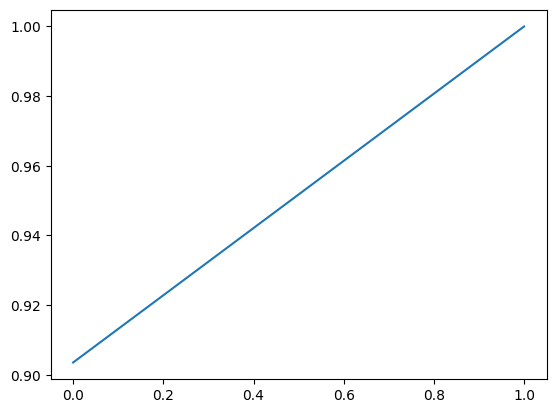

In [27]:
plt.plot(np.cumsum(variance_of_component))
plt.show()